In [1]:

import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import precision_score,f1_score,recall_score,classification_report,accuracy_score
import joblib
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

     


In [2]:
data_train=pd.read_csv("New_train_sample.csv")
     

data_train
     

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1.709400e+12,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,9.277130e+11,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1.090920e+12,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1.434520e+12,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1.005020e+12,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496505,6866892,1.219770e+12,21,414,109128,2024-06-04T12:59:54.000Z,3,4,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
496506,2469335,4.380870e+11,150,57379,1466541,2024-06-12T09:48:32.000Z,33,22,InitialAccess,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
496507,1727314,1.486060e+12,6,47558,246138,2024-06-09T07:42:25.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
496508,6110471,1.640680e+12,208,15359,46520,2024-06-03T18:20:33.000Z,114,92,CredentialAccess,T1003;T1005;T1119;T1539;T1550.004;T1552.001;T1...,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630


In [4]:
data_train.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'],
      dtype='object')

In [5]:
pd.set_option('display.max_columns', None)
data_train.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1.709400e+12,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [6]:
data_train.shape

(496510, 46)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496510 entries, 0 to 496509
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          496510 non-null  int64  
 1   Id                  496510 non-null  float64
 2   OrgId               496510 non-null  int64  
 3   IncidentId          496510 non-null  int64  
 4   AlertId             496510 non-null  int64  
 5   Timestamp           496510 non-null  object 
 6   DetectorId          496510 non-null  int64  
 7   AlertTitle          496510 non-null  int64  
 8   Category            496510 non-null  object 
 9   MitreTechniques     211012 non-null  object 
 10  IncidentGrade       493832 non-null  object 
 11  ActionGrouped       2935 non-null    object 
 12  ActionGranular      2935 non-null    object 
 13  EntityType          496510 non-null  object 
 14  EvidenceRole        496510 non-null  object 
 15  DeviceId            496510 non-nul

In [9]:
data_train.isnull().sum()/len(data_train)*100

Unnamed: 0             0.000000
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.500957
IncidentGrade          0.539365
ActionGrouped         99.408874
ActionGranular        99.408874
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        99.004048
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApp

In [12]:
# removing 50% above null value 
threshold= len(data_train)* 0.5   
data_train=data_train.dropna(thresh=threshold,axis=1)
     

In [13]:
data_train.shape

(496510, 36)

In [14]:
data_train.duplicated().sum()

np.int64(0)

In [15]:
data_train.drop_duplicates(inplace=True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\554132417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop_duplicates(inplace=True)


In [16]:
data_train.isnull().sum()

Unnamed: 0               0
Id                       0
OrgId                    0
IncidentId               0
AlertId                  0
Timestamp                0
DetectorId               0
AlertTitle               0
Category                 0
IncidentGrade         2678
EntityType               0
EvidenceRole             0
DeviceId                 0
Sha256                   0
IpAddress                0
Url                      0
AccountSid               0
AccountUpn               0
AccountObjectId          0
AccountName              0
DeviceName               0
NetworkMessageId         0
RegistryKey              0
RegistryValueName        0
RegistryValueData        0
ApplicationId            0
ApplicationName          0
OAuthApplicationId       0
FileName                 0
FolderPath               0
ResourceIdName           0
OSFamily                 0
OSVersion                0
CountryCode              0
State                    0
City                     0
dtype: int64

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496510 entries, 0 to 496509
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          496510 non-null  int64  
 1   Id                  496510 non-null  float64
 2   OrgId               496510 non-null  int64  
 3   IncidentId          496510 non-null  int64  
 4   AlertId             496510 non-null  int64  
 5   Timestamp           496510 non-null  object 
 6   DetectorId          496510 non-null  int64  
 7   AlertTitle          496510 non-null  int64  
 8   Category            496510 non-null  object 
 9   IncidentGrade       493832 non-null  object 
 10  EntityType          496510 non-null  object 
 11  EvidenceRole        496510 non-null  object 
 12  DeviceId            496510 non-null  int64  
 13  Sha256              496510 non-null  int64  
 14  IpAddress           496510 non-null  int64  
 15  Url                 496510 non-nul

In [ ]:
# filling null values 
data_train["IncidentGrade"].fillna(data_train["IncidentGrade"].mode()[0],inplace=True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\270504179.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train["IncidentGrade"].fillna(data_train["IncidentGrade"].mode()[0],inplace=True)
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\270504179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["IncidentGrade"].fillna

In [20]:
data_train.isnull().sum()

Unnamed: 0            0
Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [21]:
data_train.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [22]:
data_train['Timestamp']=pd.to_datetime(data_train['Timestamp'])

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\3240157036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['Timestamp']=pd.to_datetime(data_train['Timestamp'])


In [23]:
data_train['Timestamp'].head()

0   2024-06-06 05:56:47+00:00
1   2024-06-03 10:45:09+00:00
2   2024-06-13 03:36:40+00:00
3   2024-06-08 16:54:57+00:00
4   2024-06-09 02:48:01+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [24]:
data_train["Day"]=data_train["Timestamp"].dt.day
data_train["Month"]=data_train["Timestamp"].dt.month
data_train["Year"]=data_train["Timestamp"].dt.year
data_train["Hour"]=data_train["Timestamp"].dt.hour
data_train["Time"]=data_train["Timestamp"].dt.time
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\2321260370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Day"]=data_train["Timestamp"].dt.day
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\2321260370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Month"]=data_train["Timestamp"].dt.month
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\2321260370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [25]:
data_train.drop("Timestamp",axis=1,inplace=True)

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\3844173038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop("Timestamp",axis=1,inplace=True)


In [27]:
print(data_train.head())

   Unnamed: 0            Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1.709400e+12     26       18583   687462          31   
1     8470561  9.277130e+11     33        5065     3990          38   
2     5897583  1.090920e+12    201      150787   807590         419   
3     3288552  1.434520e+12    204      108287    28575          44   
4     4060961  1.005020e+12     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType EvidenceRole  \
0         813             Malware  BenignPositive       File      Related   
1          25              Impact  BenignPositive    Machine     Impacted   
2         444           Execution  BenignPositive    Machine     Impacted   
3        1233  SuspiciousActivity    TruePositive       File      Related   
4       58829        Exfiltration  BenignPositive       File     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799    1296     360606  160396      

In [28]:
data_train['IncidentGrade'].value_counts()

IncidentGrade
BenignPositive    216608
TruePositive      173584
FalsePositive     106318
Name: count, dtype: int64

In [29]:
data_train.Category.unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing'], dtype=object)

DATA VISUALISATION

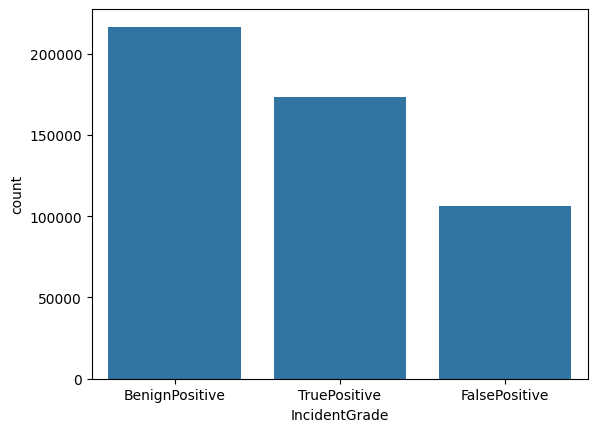

In [30]:
sns.countplot(x="IncidentGrade",data=data_train)
plt.show()

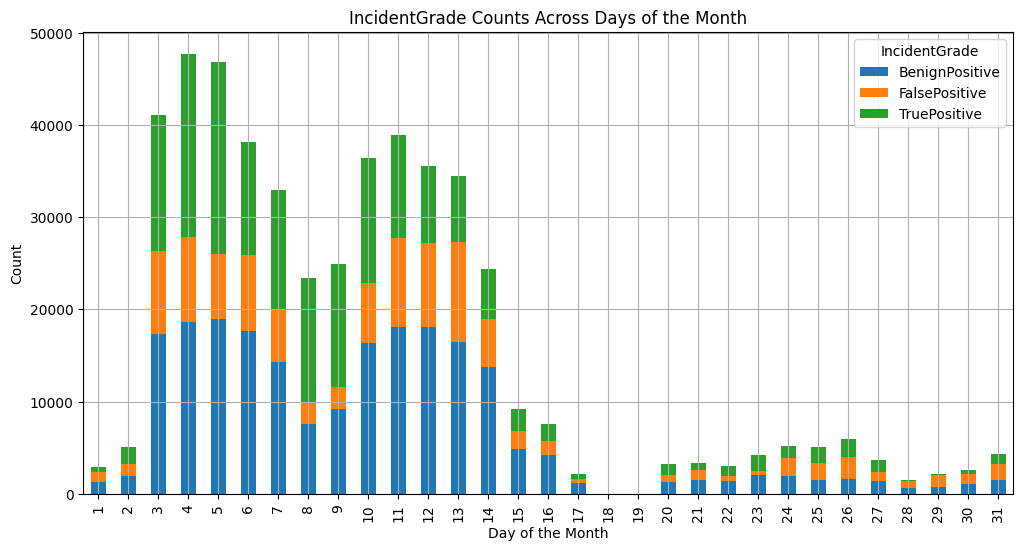

In [31]:
# Aggregate data
day_incident_grade = data_train.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

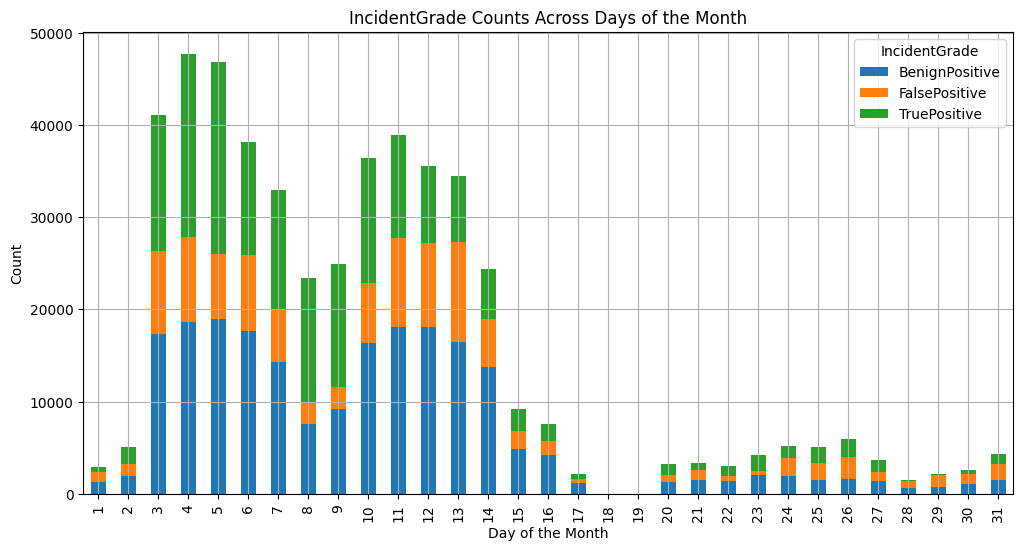

In [32]:
# Aggregate data
day_incident_grade = data_train.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()
     

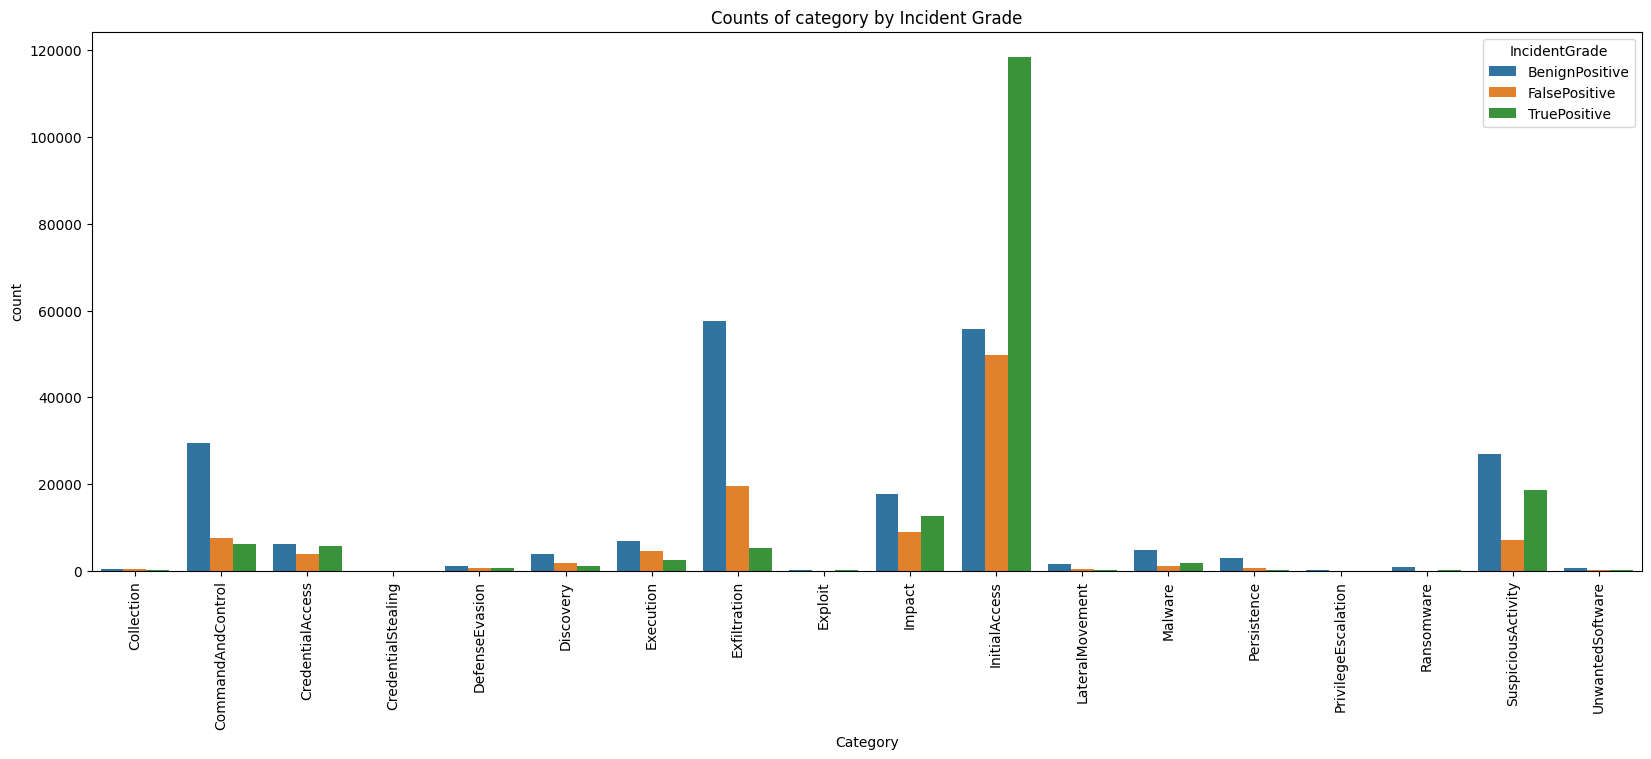

In [33]:
# Aggregate data
grouped_data=data_train.groupby(["Category","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="Category", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of category by Incident Grade")
plt.show()

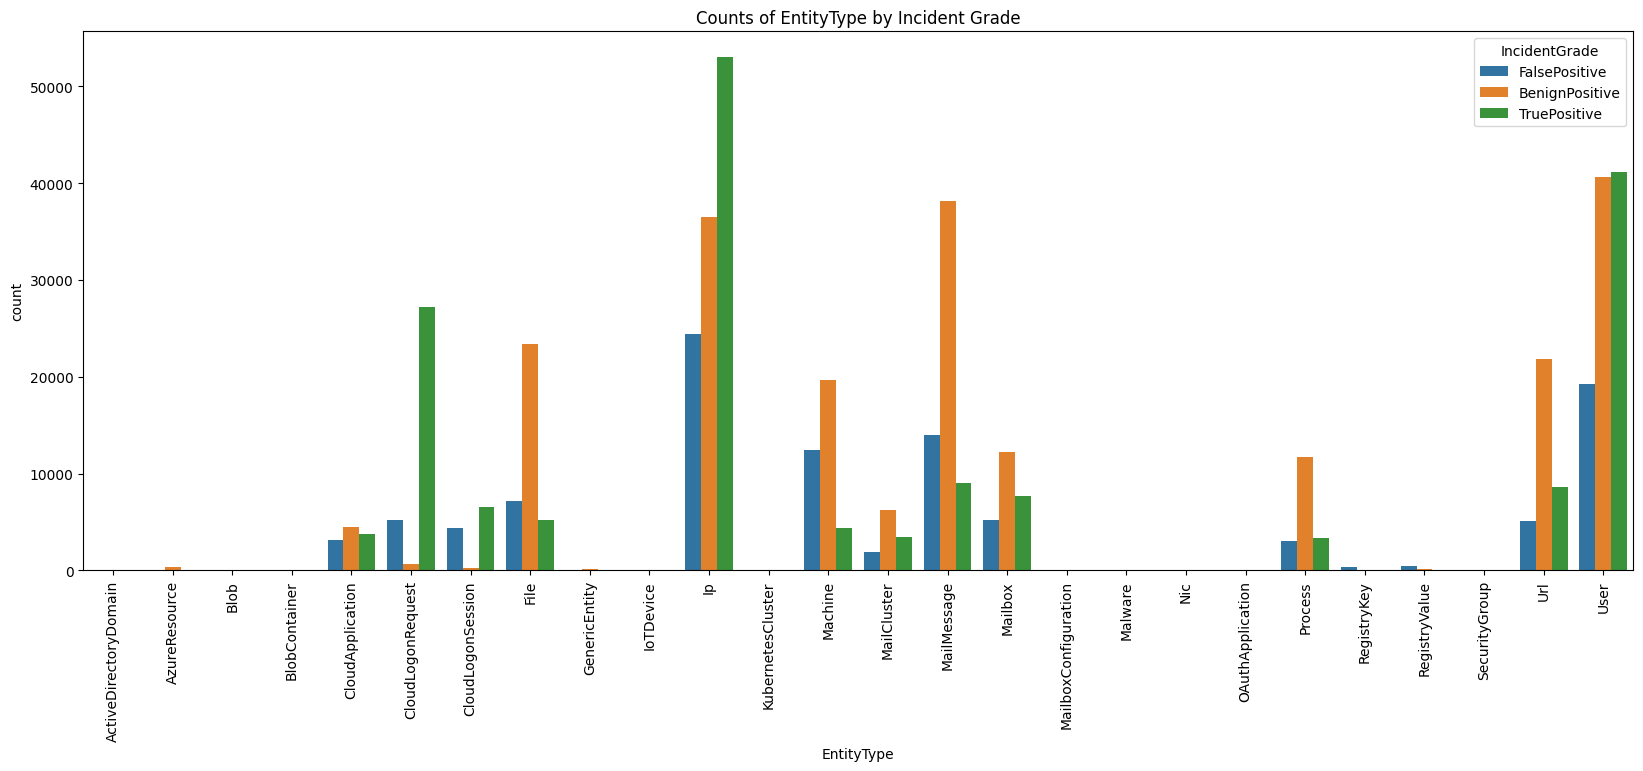

In [34]:
# Aggregate data
grouped_data=data_train.groupby(["EntityType","IncidentGrade"]).size().reset_index(name="count")

plt.figure(figsize=(20,7))
sns.barplot(data=grouped_data,x="EntityType", y="count", hue = "IncidentGrade")
plt.xticks(rotation=90)
plt.title("Counts of EntityType by Incident Grade")
plt.show()


In [35]:
# dropping 70% above correlated columns
data_train.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\2291722817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(["Month","DeviceName","DeviceId","ResourceIdName","Unnamed: 0","OAuthApplicationId","NetworkMessageId"], axis =1 , inplace = True)


In [36]:
data_train['State'].fillna(data_train['State'].mode()[0], inplace=True)
data_train['CountryCode'].fillna(data_train['CountryCode'].mode()[0], inplace=True)
data_train['City'].fillna(data_train['City'].mode()[0], inplace=True)
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\1692748848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['State'].fillna(data_train['State'].mode()[0], inplace=True)
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\1692748848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['State'].fillna(data_train['State'].

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496510 entries, 0 to 496509
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 496510 non-null  float64
 1   OrgId              496510 non-null  int64  
 2   IncidentId         496510 non-null  int64  
 3   AlertId            496510 non-null  int64  
 4   DetectorId         496510 non-null  int64  
 5   AlertTitle         496510 non-null  int64  
 6   Category           496510 non-null  object 
 7   IncidentGrade      496510 non-null  object 
 8   EntityType         496510 non-null  object 
 9   EvidenceRole       496510 non-null  object 
 10  Sha256             496510 non-null  int64  
 11  IpAddress          496510 non-null  int64  
 12  Url                496510 non-null  int64  
 13  AccountSid         496510 non-null  int64  
 14  AccountUpn         496510 non-null  int64  
 15  AccountObjectId    496510 non-null  int64  
 16  Ac

FEATURE SELECTION AND CORRELATION

In [38]:
#Selecting numerical column
numeric_data=data_train.select_dtypes(include=['number'])

In [39]:
cor_matrix=numeric_data.corr().abs()

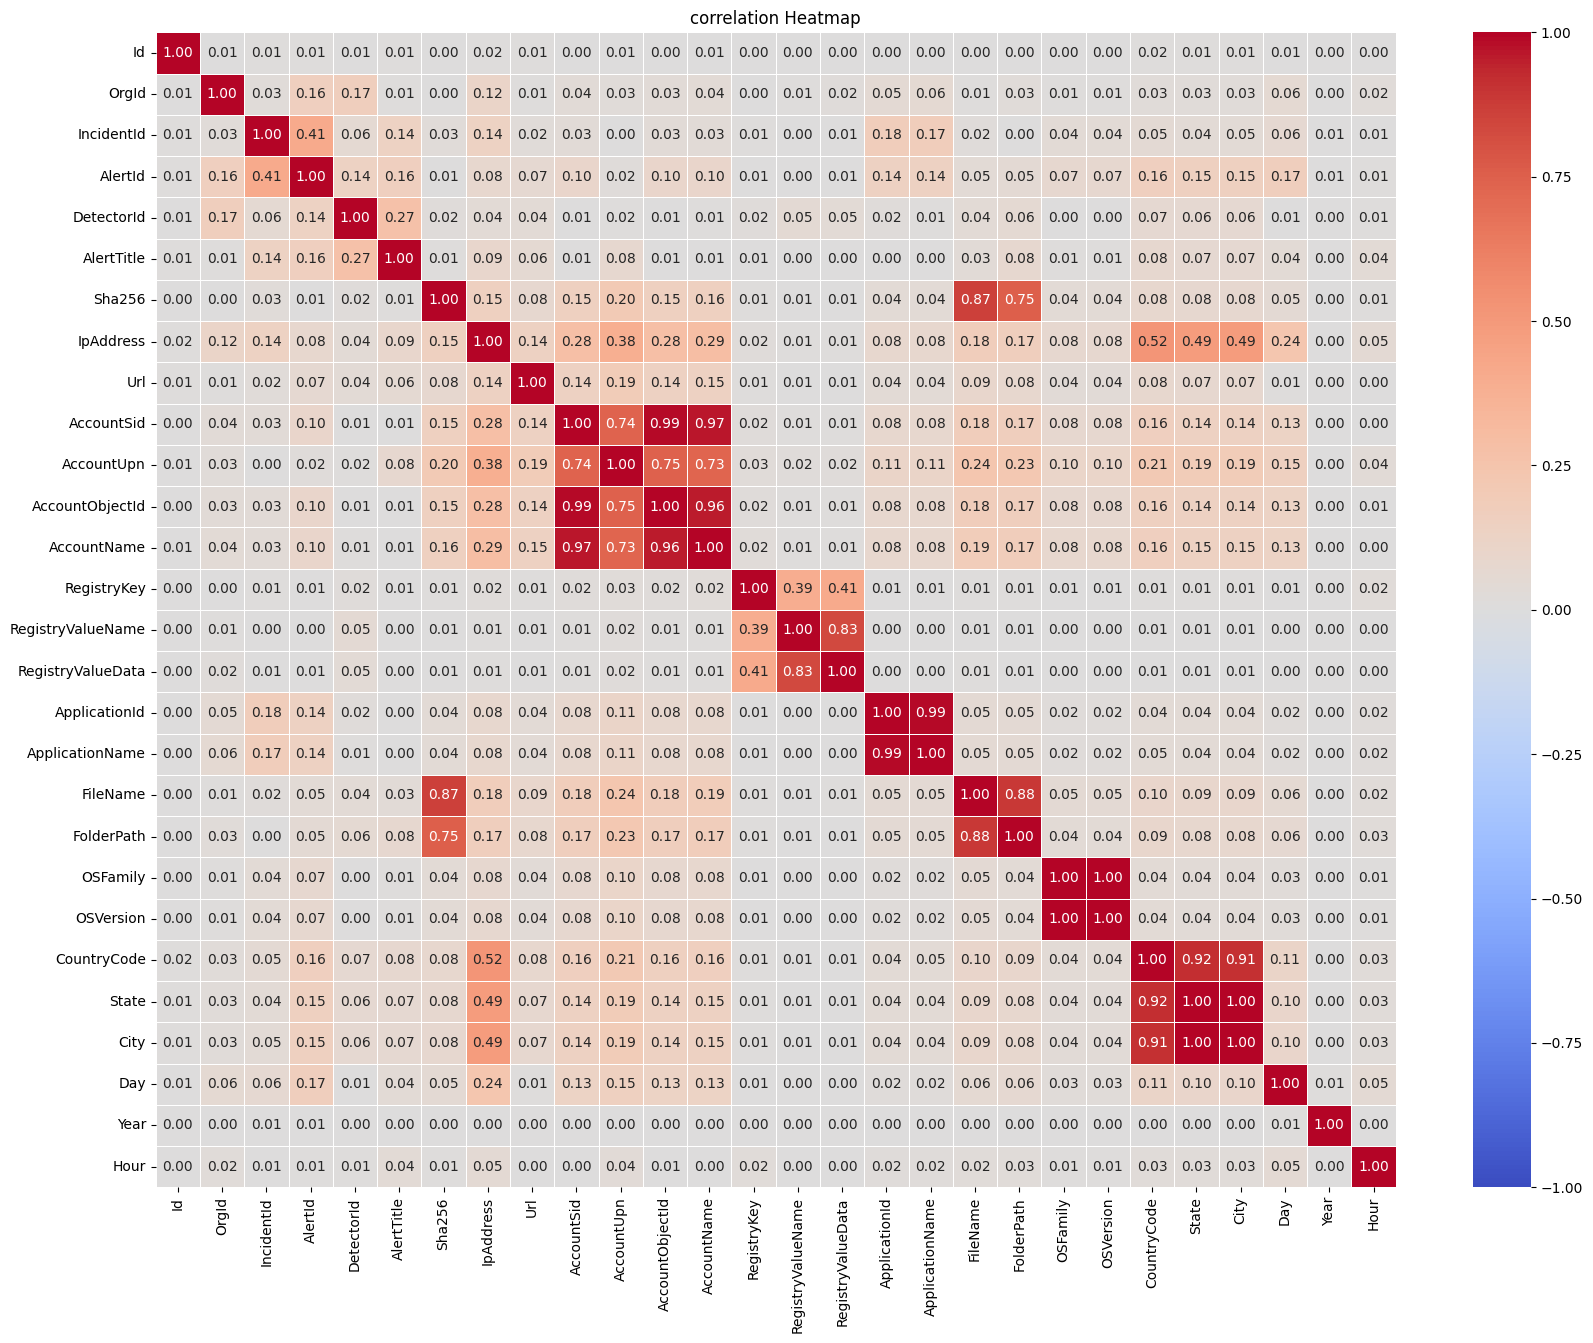

In [40]:
#plotting heat map
plt.figure(figsize=(20,15))
sns.heatmap(cor_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

In [41]:

# dropping 70% above correlated columns
data_train.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\3327715952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(["CountryCode","Sha256","ApplicationName","RegistryValueName","AccountSid","AccountObjectId","FolderPath","AccountUpn"], axis =1 , inplace = True)


In [42]:
# dropping 70% above correlated columns
data_train.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\1035668899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(["RegistryKey","RegistryValueData","DetectorId","Id" ], axis =1 , inplace = True)


In [43]:
# dropping 70% above correlated columns
data_train.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\1029985397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.drop(["OSFamily","OSVersion",'State','FileName','AccountName' ], axis =1 , inplace = True)


In [44]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496510 entries, 0 to 496509
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   OrgId          496510 non-null  int64 
 1   IncidentId     496510 non-null  int64 
 2   AlertId        496510 non-null  int64 
 3   AlertTitle     496510 non-null  int64 
 4   Category       496510 non-null  object
 5   IncidentGrade  496510 non-null  object
 6   EntityType     496510 non-null  object
 7   EvidenceRole   496510 non-null  object
 8   IpAddress      496510 non-null  int64 
 9   Url            496510 non-null  int64 
 10  ApplicationId  496510 non-null  int64 
 11  City           496510 non-null  int64 
 12  Day            496510 non-null  int32 
 13  Year           496510 non-null  int32 
 14  Hour           496510 non-null  int32 
 15  Time           496510 non-null  object
dtypes: int32(3), int64(8), object(5)
memory usage: 54.9+ MB


ENCODING

In [45]:
data_train.select_dtypes(include=["object"]).columns

Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time'], dtype='object')

In [46]:
Categorical_col=['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'Time']
     

In [47]:
encoders = {}
for i in Categorical_col:
    le = LabelEncoder()
    data_train[i]=le.fit_transform(data_train[i])
    encoders[i]=le
     

C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\4010167338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[i]=le.fit_transform(data_train[i])
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\4010167338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train[i]=le.fit_transform(data_train[i])
C:\Users\jaguh\AppData\Local\Temp\ipykernel_48952\4010167338.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [48]:
data_train

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,7,1,360606,160396,2251,10630,6,2024,5,20532
1,33,5065,3990,25,9,0,12,0,360606,160396,2251,10630,3,2024,10,37135
2,201,150787,807590,444,6,0,12,0,360606,160396,2251,10630,13,2024,3,12512
3,204,108287,28575,1233,16,2,7,1,360606,160396,2251,10630,8,2024,16,58993
4,54,528202,1458226,58829,7,0,7,0,360606,160396,2251,10630,9,2024,2,9710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496505,21,414,109128,4,16,0,10,1,158984,160396,2251,10630,4,2024,12,45065
496506,150,57379,1466541,22,10,0,14,1,360606,160396,2251,10630,12,2024,9,33840
496507,6,47558,246138,2,1,0,24,1,360606,3303,2251,10630,9,2024,7,26581
496508,208,15359,46520,92,2,1,7,1,360606,160396,2251,10630,3,2024,18,64074


In [49]:
data_train.select_dtypes(include=["int32", "int64","float64"]).columns

Index(['OrgId', 'IncidentId', 'AlertId', 'AlertTitle', 'Category',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'IpAddress', 'Url',
       'ApplicationId', 'City', 'Day', 'Year', 'Hour', 'Time'],
      dtype='object')

In [51]:
data_train.to_csv('datatrain_processed.csv',index=False)

TRAIN TEST SPLIT

In [52]:
data_train.head()

,OrgId,IncidentId,AlertId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,ApplicationId,City,Day,Year,Hour,Time
0,26,18583,687462,813,12,0,7,1,360606,160396,2251,10630,6,2024,5,20532
1,33,5065,3990,25,9,0,12,0,360606,160396,2251,10630,3,2024,10,37135
2,201,150787,807590,444,6,0,12,0,360606,160396,2251,10630,13,2024,3,12512
3,204,108287,28575,1233,16,2,7,1,360606,160396,2251,10630,8,2024,16,58993
4,54,528202,1458226,58829,7,0,7,0,360606,160396,2251,10630,9,2024,2,9710


In [53]:
from imblearn.over_sampling import RandomOverSampler
os =RandomOverSampler(random_state = 94)
val =data_train.drop('IncidentGrade', axis =1)
tar = data_train['IncidentGrade']
tar.value_counts()

IncidentGrade
0    216608
2    173584
1    106318
Name: count, dtype: int64

In [54]:
oval,otar = os.fit_resample(val,tar)
otar.value_counts()  

IncidentGrade
0    216608
2    216608
1    216608
Name: count, dtype: int64

FEATURE SELECTION

In [55]:
fs = RandomForestClassifier(n_estimators = 800, random_state =79)
     
fs.fit(oval,otar)
     

RandomForestClassifier(n_estimators=800, random_state=79)

In [56]:
pd.DataFrame({
    "columns": oval.columns,
    "Score": fs.feature_importances_
}).sort_values('Score', ascending =False).head(15)["columns"].to_list()
  

['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']

In [57]:
oval = oval[['OrgId',
 'IncidentId',
 'AlertId',
 'AlertTitle',
 'Day',
 'Category',
 'Time',
 'EntityType',
 'Hour',
 'IpAddress',
 'City',
 'Url',
 'EvidenceRole',
 'ApplicationId',
 'Year']]
    

In [58]:
# Train Test Split
traindata,testdata, trainlab,testlab = train_test_split(oval,otar, test_size = 0.20, random_state = 43)
     

In [59]:
traindata.shape

(519859, 15)

In [60]:
testdata.shape

(129965, 15)

MODEL BUILDING

In [61]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import xgboost
     

In [62]:
dt_model= DecisionTreeClassifier(max_depth=8,random_state=100,min_samples_split=10,min_samples_leaf=5,max_features="sqrt")
     

dt_model.fit(traindata,trainlab)
     

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=10, random_state=100)

In [63]:
def metrics(actual, predicted):
    acc = accuracy_score(actual, predicted) * 100
    prec = precision_score(actual, predicted, average="macro") * 100
    recall = recall_score(actual, predicted, average="macro") * 100
    macro_f1 = f1_score(actual, predicted, average="macro") * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [acc, prec, recall, macro_f1]
    }).set_index("Metrics")

In [65]:
dttr_pred =dt_model.predict(traindata)
dtts_pred =dt_model.predict(testdata)
     

dttrain_metrics=metrics(trainlab,dttr_pred)
     
dttest_metrics=metrics(testlab,dtts_pred)

In [66]:
pd.DataFrame({
    "Training":dttrain_metrics["Values"],
    "Testing":dttest_metrics["Values"]
}).reset_index()
   

,Metrics,Training,Testing
0,Accuracy,64.544040,64.468126
1,Precision,69.108066,68.979397
2,Recall,64.543815,64.469225
3,Macro F1,64.950635,64.892772


RANDOM FOREST

In [67]:
rfc =RandomForestClassifier(criterion='entropy',max_depth=10,n_estimators=200,n_jobs=-1,random_state=100)
     

In [68]:
rfc.fit(traindata,trainlab)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       n_jobs=-1, random_state=100)

In [69]:
rftr_pred =rfc.predict(traindata)
rfts_pred =rfc.predict(testdata)
     

rftrain_metrics=metrics(trainlab,rftr_pred)
rftest_metrics=metrics(testlab,rfts_pred)
     

pd.DataFrame({
    "Training":rftrain_metrics["Values"],
    "Testing":rftest_metrics["Values"]
}).reset_index()
     


,Metrics,Training,Testing
0,Accuracy,77.419454,77.376986
1,Precision,83.084274,82.910278
2,Recall,77.421080,77.370820
3,Macro F1,77.842446,77.801301


XG BOOST

In [70]:
xgbmodel = xgboost.XGBClassifier(n_estimators=200,learning_rate=0.1,random_state=100,n_jobs=-1,max_depth=8)
     

xgbmodel.fit(traindata,trainlab)
     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
xgbtr_pred =xgbmodel.predict(traindata)
xgbts_pred =xgbmodel.predict(testdata)
     

xgbtrain_metrics = metrics(trainlab,xgbtr_pred)
xgbtest_metrics =metrics(testlab,xgbts_pred)
     

pd.DataFrame({
    "Training":xgbtrain_metrics["Values"],
    "Testing":xgbtest_metrics["Values"]
}).reset_index()
     

,Metrics,Training,Testing
0,Accuracy,93.275677,92.670334
1,Precision,93.311026,92.713774
2,Recall,93.276047,92.668888
3,Macro F1,93.280680,92.677508
